In [0]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.metrics import classification_report
import random
import seaborn as sns; sns.set()

In [2]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sokrates17","key":"5f131d3215d3ab956790e657d137d6d5"}'}

In [3]:
!cp kaggle.json ~/.kaggle/

!kaggle datasets download -d mlg-ulb/creditcardfraud





 65% 43.0M/66.0M [00:01<00:01, 12.3MB/s]
100% 66.0M/66.0M [00:01<00:00, 44.1MB/s]


In [4]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [0]:
df = pd.read_csv('creditcard.csv', low_memory=False)



In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,34032.0,-1.013597,0.775128,1.454725,-0.205866,1.103614,0.270905,1.012405,0.214796,-1.072559,-0.650548,0.680928,0.405686,-0.209149,0.537752,-0.073178,0.477023,-0.907882,-0.247236,-0.417681,0.033440,-0.348386,-1.326656,-0.010161,-0.916818,0.289774,-0.860631,0.011843,0.056478,56.00,0
1,59179.0,-0.140147,0.759430,1.190451,1.536675,0.101724,-0.353365,0.627012,-0.340850,-0.244497,0.581007,0.170074,0.044358,0.121937,0.116684,1.833912,-1.043391,0.329448,-0.383772,0.856240,-0.002307,0.151887,0.778913,0.344737,0.408265,-1.384990,-0.463453,-0.074757,0.030619,14.95,0
2,2006.0,-0.670536,0.309306,2.224977,0.058438,-0.716694,-0.231946,0.051173,-0.142354,0.821469,0.081865,-0.626291,-0.019221,0.014454,-0.784279,0.666485,-0.423051,0.161802,-0.130403,1.349602,0.215080,-0.097378,0.238707,0.120035,0.475907,-0.694122,1.025187,-0.039195,-0.013301,20.00,0
3,164722.0,-11.290174,-9.961478,-3.433531,7.640636,-0.074734,0.444372,-0.719086,0.155330,-1.052571,1.499503,-0.217471,0.424655,0.754031,1.320109,1.323310,2.019897,0.017418,1.373053,1.255968,-0.743420,0.591751,-0.531335,-4.651133,0.750252,-1.217783,0.417779,2.248959,-2.556631,628.02,0
4,144777.0,2.062545,0.164518,-2.044051,0.117093,0.807410,-0.891334,0.651657,-0.351893,-0.168136,0.187756,1.219259,1.302754,0.480740,0.859807,-0.283691,-0.464203,-0.565929,-0.125600,0.213437,-0.179731,0.172133,0.596082,0.015831,0.750068,0.412541,-0.219138,-0.056457,-0.071851,5.90,0


In [0]:
fraud = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]

In [9]:
print(len(fraud))

492


In [11]:
print(df.describe())

                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  1.193972e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]


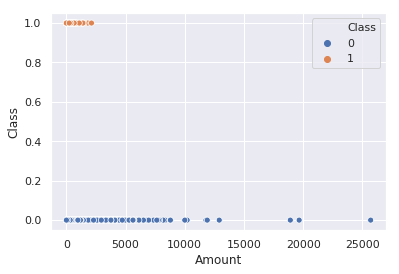

In [31]:
ax = sns.scatterplot(x='Amount', y='Class',hue = 'Class', data=df)

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [0]:
x = df.iloc[:,:-1]

In [0]:
y = df['Class']

In [0]:
X_train, X_test, y_train, y_test = train_test_split (x, y, test_size = 0.35)

In [0]:
logistic = linear_model.LogisticRegression(C=1e5)

In [18]:
logistic.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
print ('Score:', logistic.score(X_test, y_test))

Score: 0.9986958658948868


In [37]:
y_predicted = np.array(logistic.predict(X_test))
print(y_predicted)

[0 0 0 ... 0 0 0]


In [38]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99500
           1       0.70      0.51      0.59       183

    accuracy                           1.00     99683
   macro avg       0.85      0.76      0.80     99683
weighted avg       1.00      1.00      1.00     99683

